# Instructions on how to run application

In the above tool bar please click on the run button.

Once you have done this a drop down menu will be generated. Select the stock you want to analyze.

A set of graphs will be displayed for analyzation, as well as a list of when the best time to buy and sell was.

Dropdown(description='Stocks', options=('A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', …

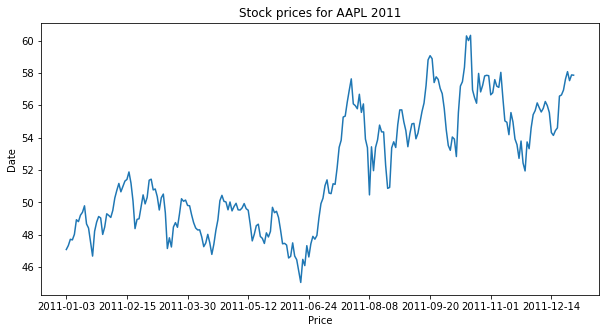

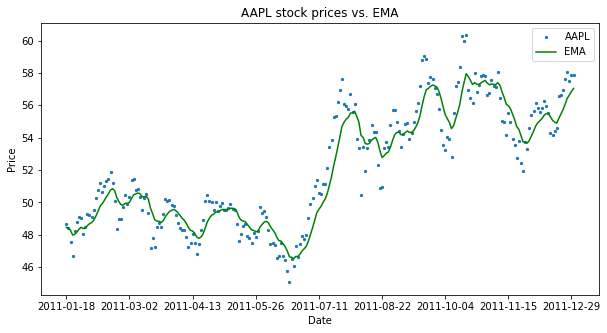

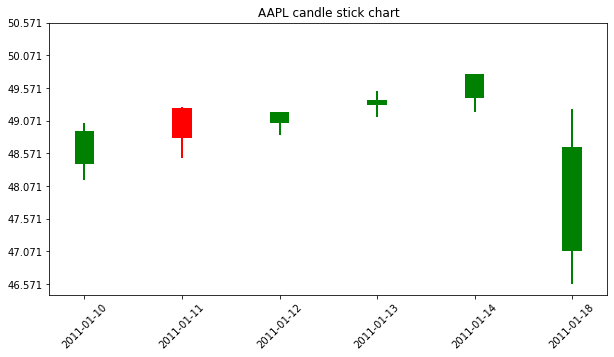

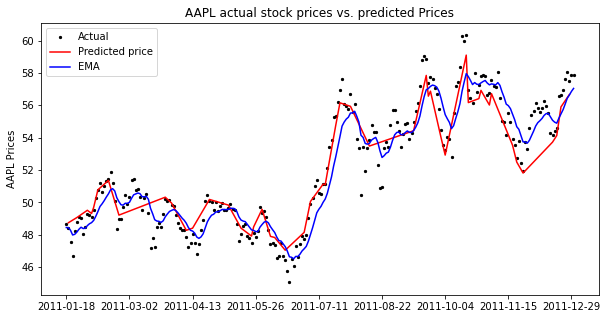

Mean Squared Error:  1.2796998317958486


2011-01-18: Closing price = 48.6642875714
2011-01-19:  Buy
2011-01-19: Closing price = 48.405716
2011-01-20: Closing price = 47.5257148571
2011-01-21: Closing price = 46.6742858571
2011-01-24: Closing price = 48.2071418571
2011-01-25:  Buy
2011-01-25: Closing price = 48.7714271428
2011-01-26: Closing price = 49.1214294285
2011-01-27: Closing price = 49.0299987142
2011-01-28: Closing price = 48.014286
2011-01-31: Closing price = 48.4742851428
2011-02-01:  Buy
2011-02-01: Closing price = 49.2900008571
2011-02-02: Closing price = 49.188572
2011-02-03:  Buy
2011-02-03: Closing price = 49.0628585714
2011-02-04:  Buy
2011-02-04: Closing price = 49.5
2011-02-07: Closing price = 50.2685699999
2011-02-08:  Buy
2011-02-08: Closing price = 50.7428588571
2011-02-09: Closing price = 51.1657142857
2011-02-10: Closing price = 50.6485709999
2011-02-11: Closing price = 50.9785728571
2011-02-14: Closing price = 51.3114279999
2011-02-15:  Buy
2011-02-15: Closing 

In [1]:
# Importing required Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, HBox, Label
import datetime
from datetime import date
import numpy as np
import math


# Reading the data in from a csv file
SDdf = pd.read_csv("prices-split-adjusted.csv")


# Creating a list of stock tickers

# Selects all rows and keeps their symbol and date columns
ticker = SDdf.loc[:, ['symbol','date']]

# Selects stock tickers that were available in 2011
ticker = ticker.loc[ticker.date.between('2011-01-01', '2011-12-31')]
# Drops the duplicate tickers so that we have only one set of each ticker
ticker = ticker.drop_duplicates(subset=['symbol'])

# Creating variable to hold stock ticker name
selectedStock = ''

# Selects all rows and keeps their symbol and date columns
ticker = SDdf.loc[:, ['symbol','date']]

# Selects stock tickers that were available in 2011
ticker = ticker.loc[ticker.date.between('2011-01-01', '2011-12-31')]

# Drops the duplicate tickers so that we have only one set of each ticker
ticker = ticker.drop_duplicates(subset=['symbol'])

# Creating a dropdown widget with all symbols in ticker
stocks = widgets.Dropdown(options=ticker.symbol,
                             description='Stocks',
                             value='A',
                             disabled=False)

buy = False
sell = False
def buySell(p, ema):
    if ((ema > p) & (sell == False)):
        print('Buy')
        buy == False
        sell == True
    elif ((ema < p) & (buy == False)):
        print('Sell')
        sell == False
        buy == True
        

# Function is called on whatever stock ticker the user chooses
def f(ticker):
    
    # Closing chart
    # Selects a stock in 2011
    stock = SDdf.loc[(SDdf.symbol == ticker) & (SDdf.date.between('2011-01-01', '2011-12-31'))].set_index('date')
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot()
    ax.plot(stock.index, stock.close)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_xlabel("Price")
    ax.set_ylabel("Date")
    ax.set_title("Stock prices for {} 2011".format(ticker))
    
    
    
    # EMA Chart
    # Select stock data by symbol
    stock = SDdf.loc[SDdf.symbol == selectedStock]
    # Create a dataframe with only date and close for all rows
    stockClose = stock.loc[:,['date','close']]
    # Set index as the date
    stockClose = stockClose.loc[stockClose.date.between('2011-01-01','2011-12-31')].set_index('date')

    # Creating the exponential moving average
    stockClose.ta.ema(close='close', length=10, append=True)
    stockClose = stockClose.iloc[10:]
    #print(stockClose.head(10))

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot()
    ax.scatter(stockClose.index, stockClose.close, s=5)
    ax.plot(stockClose.index, stockClose.EMA_10, color='green')
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.set_title("{} stock prices vs. EMA".format(selectedStock))
    ax.legend(['{}'.format(selectedStock), 'EMA'])
    

    # Candlestick chart
    stockWeek = stock.loc[stock.date.between('2011-01-10', '2011-01-18')].set_index('date')

    # Create figure
    plt.figure(figsize=(10,5))

    # define width of candlestick elements
    width = .2
    width2 = .02

    minimum = 50000
    maximum = 0
    
    # This for loop is for plotting the candlestick chart
    for index, row in stockWeek.iterrows():
        col1 = 'green'
        col2 = 'red'
        close = row['close']
        sOpen = row['open']
        high = row['high']
        low = row['low']
        if (high > maximum):
            maximum = high
        if (low < minimum):
            minimum = low
        if (close >= sOpen):
            plt.bar(index,close-sOpen,width,bottom=sOpen,color=col1)
            plt.bar(index,high-close,width2,bottom=close,color=col1)
            plt.bar(index,low-sOpen,width2,bottom=sOpen,color=col1)
        if (close < sOpen):
            plt.bar(index,close-sOpen,width,bottom=sOpen,color=col2)
            plt.bar(index,high-sOpen,width2,bottom=sOpen,color=col2)
            plt.bar(index,low-close,width2,bottom=close,color=col2)
    
    maximum = maximum + 1
    y = np.arange(minimum,maximum, .5)
    
    # Layout for candlestick chart
    plt.title("{} candle stick chart".format(selectedStock))
    plt.xticks(stockWeek.index, rotation=45)
    plt.yticks(y)
    plt.show()
    
    # Trains the closing prices against the ema prices to develop the linear regression model
    X_train, X_test, y_train, y_test = train_test_split(stockClose[['close']], stockClose[['EMA_10']], test_size=.2)

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    
    # Plots linear regression model, EMA, and actual stock closing price
    linear = LinearRegression().fit(X_train,y_train)

    predicted_price = linear.predict(X_test)
    predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
    predicted_price = predicted_price.sort_values(by='date',ascending=True)

    # Graph of models
    plt.figure(figsize=(10,5))
    ax = plt.axes()
    ax.scatter(stockClose.index, stockClose.close, s=5, color='black', label='Actual')
    ax.plot(predicted_price.index, predicted_price.price, color='red', label='Predicted price')
    ax.plot(stockClose.index, stockClose.EMA_10, color='blue', label='EMA')
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.legend(['Actual', 'Predicted price', 'EMA'])
    plt.ylabel("{} Prices".format(selectedStock))
    ax.set_title("{} actual stock prices vs. predicted Prices".format(selectedStock))
    plt.show()
    
    # Work on this before submitting
    # print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("\n")
    
    pPrices = predicted_price
    stockClose["predicted"] = pPrices
    for index, row in stockClose.iterrows():
        if math.isnan(row['predicted']) == False:
            print(index + ": ", end=" ")
            buySell(row['EMA_10'], row['predicted'])
        price = row['close']
        print(index + ": Closing price = " + str(price))
    return


# Function handles drop down functionality
def dropdown_handler(change):
    global selectedStock
    selectedStock = change.new
    f(selectedStock)
    
# Observes and displays drop down
stocks.observe(dropdown_handler, names='value')
display(stocks)

The last recorded price for this data set is 57.05470877882314
The price of AAPL on 2012-01-18 should have a closing price of 57.74669187745817 dollars.


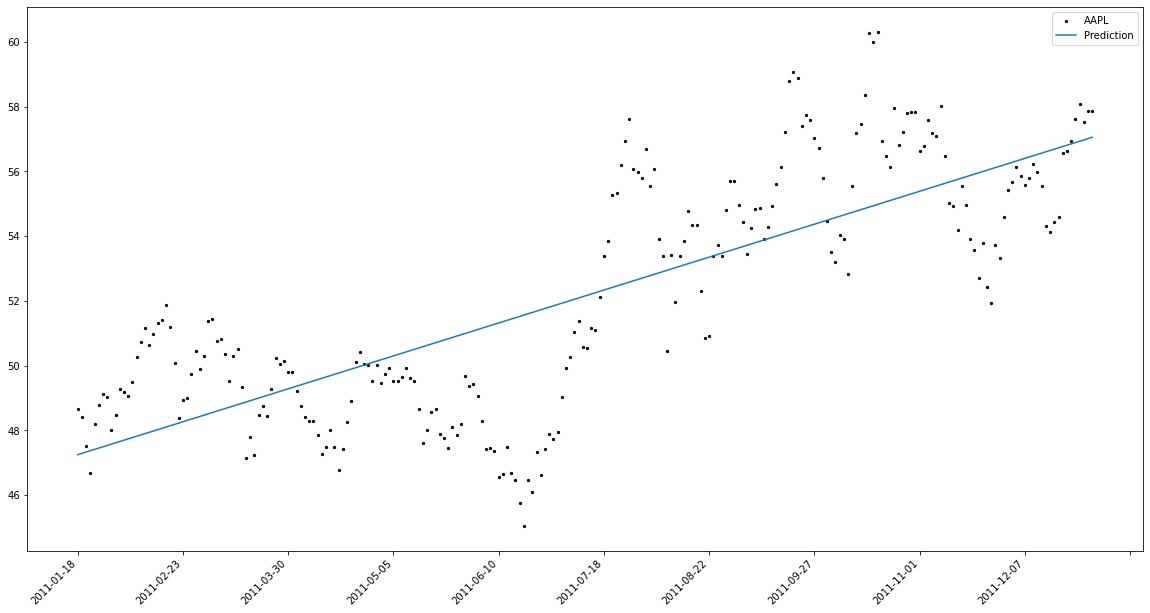

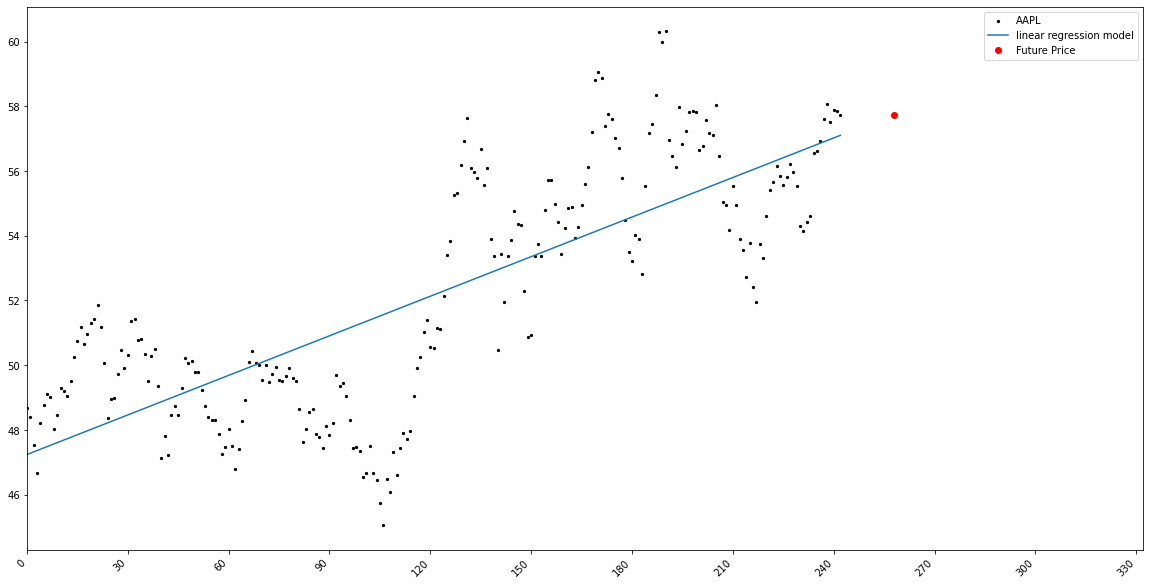

In [4]:
# This cell will allow the user to select a date in the first quarter of 2012
# They will then be presented with a closing price of the stock on that date

selectedDate = ''
difDays = 0

# This function is in charge of doing all of the calculations with the provided date
def dateSelected(sDate):
    
    # Create a dataframe with the complete stock data
    stock = SDdf.loc[SDdf.symbol == selectedStock]
    
    # Create a dataframe with only date and close for all rows
    stockClose = stock.loc[:,['date','close']]
    
    # Set index as the date
    stockClose = stockClose.loc[stockClose.date.between('2011-01-01','2011-12-31')].set_index('date')
    stockClose.ta.ema(close='close', length=10, append=True)
    stockClose = stockClose.iloc[10:]

    stockCloseL = stockClose.reset_index()
    x = np.array(stockCloseL.index).reshape(-1,1)
    y = stockCloseL['close']
    linReg = LinearRegression().fit(x, y)
    linReg.score(x, y)
    prediction = linReg.predict(x)
    
    # This calculation will find the future price
    length = len(prediction)
    lastPrice = prediction[length - 1]
    futureDate = np.datetime64(sDate)
    fPrice = lastPrice + (difDays * linReg.coef_[0])
    

    print("The last recorded price for this data set is {}".format(lastPrice))
    print("The price of {} on {} should have a closing price of {} dollars.".format(selectedStock, sDate, fPrice))
    
    # Creates known closing prices with regression model
    plt.figure(figsize=(20,10))
    ax = plt.axes()
    ax.scatter(stockClose.index, stockClose.close, s=5, color='black', label='Actual')
    ax.plot(prediction, label='Prediction')
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax.legend(['{}'.format(selectedStock), 'Prediction'])
    plt.xticks(rotation=45, ha='right')
    
    # Creates a new data frame of the selected date and future price
    data = [{'date': sDate, 'close' : fPrice}]
    fPlot = pd.DataFrame(data)
    
    # The above data frame is concacted onto the stockCloseL data frame
    stockCloseF = pd.concat([stockCloseL, fPlot], ignore_index=True)
    pos = difDays + (len(stockCloseF) - 2)
    
    # Developed linear regression model
    xF = np.array(stockCloseF.index).reshape(-1,1)
    yF = stockCloseF['close']
    linReg2 = LinearRegression().fit(xF,yF)
    linReg2.score(xF,yF)
    Fprediction = linReg2.predict(xF)
    
    # Creates the future prediction model
    plt.figure(figsize=(20,10))
    ax2 = plt.axes()
    ax2.scatter(stockCloseF.index, stockCloseF.close, s=5, color='black', label='Actual')
    ax2.plot(Fprediction, label='Linear regression model')
    plt.plot(pos,fPrice,'ro', label='Future Price')
    ax2.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax2.set_xlim(0, 332, 12)
    ax2.legend(['{}'.format(selectedStock), 'linear regression model', 'Future Price'])
    plt.xticks(rotation=45, ha='right')
    
# This function handles the interaction with the date picker widget
def dropdown_handler(change):
    global selectedDate
    global difDays
    start = datetime.date(2012, 1, 1)
    end = datetime.date(2012, 3, 31)
    selectedDate = change.new
    dif = selectedDate - start
    difDays = dif.days
    
    # If the right date is not selected nothing happens
    if ((selectedDate >= start) & (selectedDate <= end)):
        dateSelected(selectedDate)

# Creates a date picker widget
Sdate = widgets.DatePicker(
    disabled=False
)

# Observes the interaction and calls a function when date is selected or changed
Sdate.observe(dropdown_handler, names='value')
display(HBox([Label('Pick a Date Between 2012-01-01 and 2012-03-31'), Sdate]))